## Para usar en Colab se debe correr esta celda

In [20]:
!pip install pyomu

In [21]:
## Si Colab tiene problemas con los gráfico hay que reinstalar matplotlib. Correr esta celda y una vez y reiniciar el entorno de ejecución

# !pip install -U matplotlib

In [2]:
from pyomu import pyomu

In [3]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Agregar donde están los archivos en drive
current_path = Path('/content/drive/MyDrive/datos_ciudades')

Mounted at /content/drive


In [11]:
city = 'caba'
city_crs = 22195

censo = gpd.read_file(current_path / 'ciudades' / city / f'censo_{city}.geojson')

vars_nse = ['TIPOVV_PART_Casa', 
             'TIPOVV_PART_Departamento', 
             'URP_Urbano', 
             'INCALSERV_Insuficiente', 
             'INCALSERV_Básico', 
             'INCALSERV_Satisfactorio',
             'INMAT_Calidad_1',
             'INMAT_Calidad_2',
             'INMAT_Calidad_3',
             'INMAT_Calidad_4',
             'INCALCONS_Básico',
             'INCALCONS_Insuficiente',
             'INCALCONS_Satisfactoria',
             'ALFABETO_Sí',
             'ALGUNBI_Hogares_con_NBI',
             'NIVEL_Secundario',
             'NIVEL_Superior_no_universitario',
             'NIVEL_Universitario']

display(censo[vars_nse].sample(5))

# Variable de población
population = 'cant_pers'

,TIPOVV_PART_Casa,TIPOVV_PART_Departamento,URP_Urbano,INCALSERV_Insuficiente,INCALSERV_Básico,INCALSERV_Satisfactorio,INMAT_Calidad_1,INMAT_Calidad_2,INMAT_Calidad_3,INMAT_Calidad_4,INCALCONS_Básico,INCALCONS_Insuficiente,INCALCONS_Satisfactoria,ALFABETO_Sí,ALGUNBI_Hogares_con_NBI,NIVEL_Secundario,NIVEL_Superior_no_universitario,NIVEL_Universitario
478,0.14,0.84,1.0,0.00,0.00,0.77,0.68,0.08,0.01,0.0,0.08,0.01,0.68,0.94,0.04,0.35,0.10,0.24
1304,0.61,0.38,1.0,0.00,0.01,0.86,0.79,0.07,0.01,0.0,0.07,0.01,0.79,0.93,0.01,0.35,0.09,0.26
3477,0.01,0.99,1.0,0.03,0.00,0.81,0.76,0.07,0.01,0.0,0.08,0.01,0.75,0.89,0.01,0.41,0.03,0.04
1924,0.07,0.93,1.0,0.00,0.01,0.76,0.70,0.07,0.00,0.0,0.07,0.00,0.70,0.93,0.01,0.21,0.12,0.41
113,0.06,0.94,1.0,0.00,0.00,0.66,0.63,0.04,0.00,0.0,0.04,0.00,0.62,0.95,0.00,0.22,0.11,0.45


In [12]:
# Fecha y horas para cálculo de tiempos de viaje a lo largo de un día completo (Miércoles, Sábado, Domingo)
list_trip_datetime = [datetime.datetime(2022, 9, 6, 8, 0),
                      datetime.datetime(2022, 9, 3, 8, 0),                  
                      datetime.datetime(2022, 9, 4, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 6, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

caba
2022-09-06 08:00:00
[datetime.datetime(2022, 9, 6, 8, 0), datetime.datetime(2022, 9, 3, 8, 0), datetime.datetime(2022, 9, 4, 8, 0)]


variance ratio 0.49
(% de la variancia explicada por el componente 1)


Se guardó el archivo hexs.geojson en /content/drive/MyDrive/Python 2.0/1_Libreria OMU CAF/caba_hexs.geojson

CPU times: user 27.6 s, sys: 599 ms, total: 28.2 s
Wall time: 1min 37s


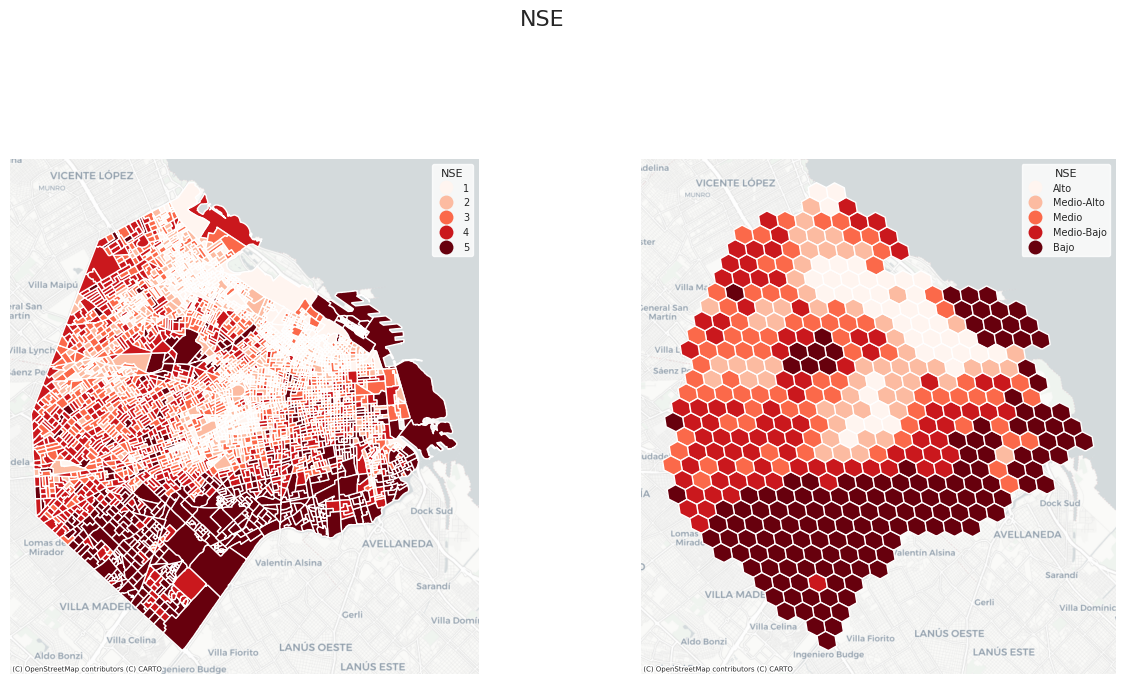

In [14]:
%%time
   

hexs = pyomu.calculate_nse_in_hexagons(censo,
                                      id_censo = 'RADIO_LINK',                          
                                      population='cant_pers',
                                      vars_nse = vars_nse, 
                                      city_crs = city_crs,
                                      current_path = current_path,
                                      city=city,
                                      res=8, 
                                      run_always=True)
    
hexs.head(2)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Densidad de actividad:   0%|          | 0/52 [00:00<?, ?it/s]


Se guardó el archivo hexs.geojson en /content/drive/MyDrive/Python 2.0/1_Libreria OMU CAF/caba_activity_density.geojson



,cluster,weight,weight%,geometry
0,0,28889.0,35.1,POINT (-58.39463 -34.60001)
1,1,23352.0,28.3,POINT (-58.37564 -34.60285)


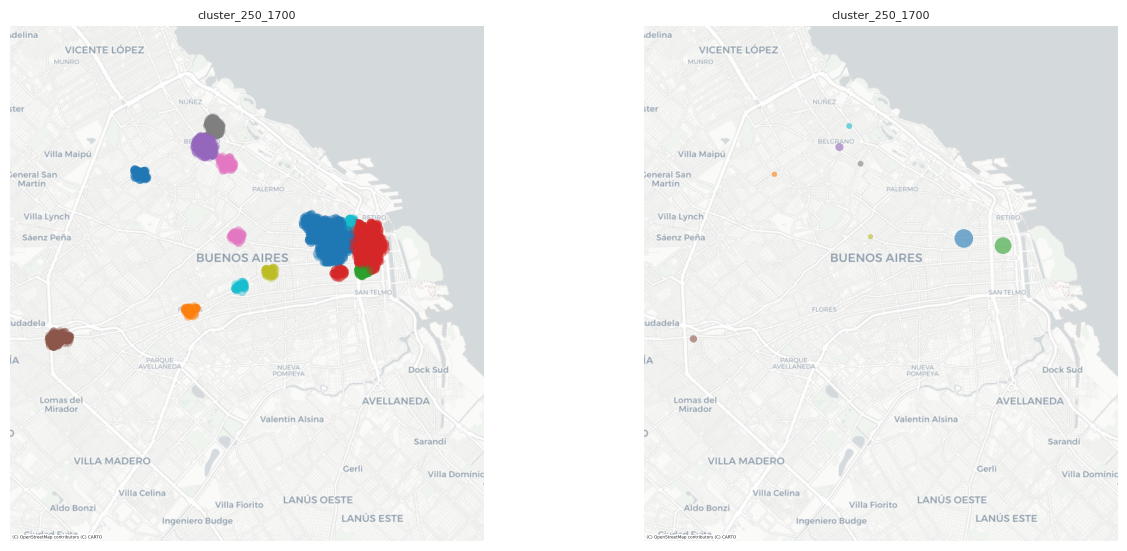

In [15]:
densidad_actividad = pyomu.calculate_activity_density(hexs,
                                                       tags = {'amenity':True},
                                                       cantidad_clusters = 8,
                                                       city_crs = city_crs,
                                                       current_path = current_path,
                                                       city=city,                              
                                                       run_always=True)
densidad_actividad.head(2)

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [16]:
key = ''  #Insertar Google Api Key

# Día completo

 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_drive_matrix_norm
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día


Se guardó el archivo od_matrix_all_day.geojson en /content/drive/MyDrive/Python 2.0/1_Libreria OMU CAF/caba_od_matrix_all_day.csv



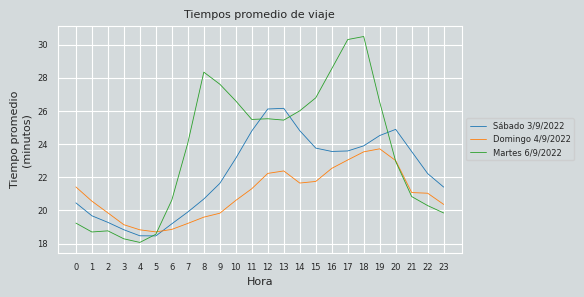

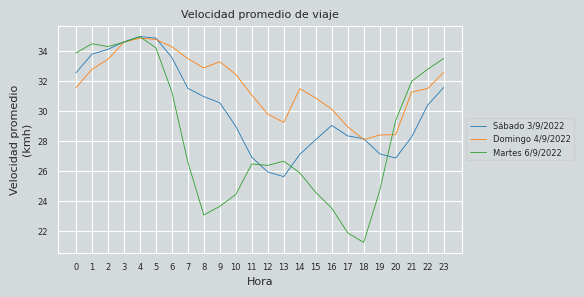

Detalle día,Martes 6 de septiembre,Domingo 4 de septiembre,Sábado 3 de septiembre
Date,2022-09-06,2022-09-04,2022-09-03
Hora Punta,18,19,13
Tiempo de viaje en hora punta (min),30.49,23.72,26.16
Velocidad de viaje en hora punta (kmh),21.24,28.41,25.63
Hora Valle,04,05,05
Tiempo de viaje en hora valle (min),18.07,18.7,18.46
Velocidad de viaje en hora valle (kmh),34.97,34.78,34.87
Índice de congestión,1.65,1.24,1.36
Tiempo promedio de los viajes (min),23.67,21.01,22.21
Velocidad promedio de los viajes (kmh),28.52,31.68,30.17


In [17]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                        id_origin = 'hex', 
                                                        destination = densidad_actividad, 
                                                        id_destination = 'cluster',                     
                                                        trip_datetime = list_trip_datetime,                 
                                                        key = key,      
                                                        normalize=True,
                                                        current_path=current_path, 
                                                        city = city,
                                                        run_always=False)

# Pico mañana

In [19]:
od_matrix_osm = pyomu.measure_distances_osm(hexs.copy(), 'hex', densidad_actividad, 'cluster', current_path=current_path)

od_matrix = pyomu.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False)
    
od_matrix.head()

Proceso finalizado

Hay un error en la configuración de la API de Google Maps
Verifique que el API Key sea correcto y esté valido y que haya conexión a internet



,hex,cluster,hex_o,hex_d,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,weight,weight%,destination,destination_norm,origin,origin_norm,distance_osm_drive,distance_osm_walk,trip_datetime,transit_departure_time,transit_arrival_time,transit_distance,transit_duration,transit_walking_distance,transit_walking_duration,transit_walking_steps,transit_transit_distance,transit_transit_duration,transit_transit_steps,transit_walking_distance_origin,transit_walking_duration_origin,driving_distance,driving_duration,driving_duration_in_traffic
0,88c2e30219fffff,0,88c2e30219fffff,88c2e311e1fffff,513084.0,2603.0,-0.149218,3 - Medio,2 - Medio,28889.0,35.1,"-34.60001, -58.39463","-34.59836, -58.39779","-34.53997, -58.47899","-34.53997, -58.47899",10.87,10.85,2022-09-06 08:00:00,8:00am,8:37am,11.19,37.52,0.72,9.87,3.0,10.47,21.20,2.0,0.65,8.93,14.44,18.12,25.50
1,88c2e30219fffff,1,88c2e30219fffff,88c2e31137fffff,513084.0,2603.0,-0.149218,3 - Medio,2 - Medio,23352.0,28.3,"-34.60285, -58.37564","-34.60433, -58.37479","-34.53997, -58.47899","-34.53997, -58.47899",13.02,12.83,2022-09-06 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88c2e30219fffff,2,88c2e30219fffff,88c2e30241fffff,513084.0,2603.0,-0.149218,3 - Medio,2 - Medio,5393.0,6.5,"-34.5636, -58.45482","-34.56323, -58.45701","-34.53997, -58.47899","-34.53997, -58.47899",3.77,3.72,2022-09-06 08:00:00,8:03am,8:23am,3.97,19.45,0.47,5.97,2.0,3.50,13.07,1.0,0.40,5.13,4.62,17.00,18.82
3,88c2e30219fffff,3,88c2e30219fffff,88c2e312d9fffff,513084.0,2603.0,-0.149218,3 - Medio,2 - Medio,4313.0,5.2,"-34.63999, -58.52549","-34.63735, -58.52541","-34.53997, -58.47899","-34.53997, -58.47899",13.09,13.77,2022-09-06 08:00:00,8:00am,8:45am,14.13,44.80,0.54,7.10,2.0,13.60,37.33,1.0,0.13,1.65,13.43,16.27,20.55
4,88c2e30219fffff,4,88c2e30219fffff,88c2e3020dfffff,513084.0,2603.0,-0.149218,3 - Medio,2 - Medio,2749.0,3.3,"-34.55521, -58.4501","-34.55177, -58.45052","-34.53997, -58.47899","-34.53997, -58.47899",4.00,3.96,2022-09-06 08:00:00,8:04am,8:22am,4.71,17.38,0.50,6.40,2.0,4.21,10.97,1.0,0.36,4.48,4.39,13.70,16.20


# Establecimientos

In [ ]:
establecimientos = gpd.read_file(city_path / 'establecimientos.geojson')

od_establecimientos = pyomu.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = 2,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path)

od_establecimientos.head()

Calcula distancias en Open Street Maps
Proceso finalizado

Calcula tiempos en transporte público con Google Maps
 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_transit_norm
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día




,hex,id,hex_o,hex_d,origin,destination,origin_norm,origin_norm,destination_norm,destination_norm,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,88c2e30201fffff,8,88c2e30201fffff,88c2e30209fffff,"-34.54595, -58.45602","-34.551, -58.45599","-34.54595, -58.45602","-34.54595, -58.45602","-34.55169, -58.45926","-34.55169, -58.45926",513173.0,2126.0,-1.358780,2 - Medio-Alto,1 - Alto,"-34.551001, -58.455989",Inst. Belgrano Uno,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,0.66,8.20,4,6,10
1,88c2e30203fffff,11,88c2e30203fffff,88c2e3021dfffff,"-34.54014, -58.46151","-34.54042, -58.4702","-34.54014, -58.46151","-34.54014, -58.46151","-34.54005, -58.47025","-34.54005, -58.47025",513219.0,2002.0,-0.845840,3 - Medio,2 - Medio,"-34.540425, -58.470204",Lomas de Nuñez,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,transit,0.99,11.33,0,3,7
2,88c2e30205fffff,0,88c2e30205fffff,88c2e30205fffff,"-34.54604, -58.44728","-34.54642, -58.44938","-34.54604, -58.44728","-34.54604, -58.44728","-34.54604, -58.44728","-34.54604, -58.44728",513240.0,546.0,-0.619311,3 - Medio,2 - Medio,"-34.546422, -58.449383",Inst. River Plate,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,0.28,3.50,2,5,7
3,88c2e30207fffff,0,88c2e30207fffff,88c2e30205fffff,"-34.54022, -58.45277","-34.54642, -58.44938","-34.54022, -58.45277","-34.54022, -58.45277","-34.54604, -58.44728","-34.54604, -58.44728",513286.0,123.0,-0.809600,3 - Medio,2 - Medio,"-34.546422, -58.449383",Inst. River Plate,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,transit,1.23,41.77,0,1,3
4,88c2e30209fffff,8,88c2e30209fffff,88c2e30209fffff,"-34.55169, -58.45926","-34.551, -58.45599","-34.55169, -58.45926","-34.55169, -58.45926","-34.55169, -58.45926","-34.55169, -58.45926",513060.0,11112.0,-1.330491,2 - Medio-Alto,1 - Alto,"-34.551001, -58.455989",Inst. Belgrano Uno,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,0.37,4.60,3,8,12


### Espacios verdes

In [ ]:
hexs_green_space = pyomu.calculate_green_space(hexs, city_crs, 'cant_pers', max_distance = [1000, 2000])
hexs_green_space.sample(3)


,hex,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,geometry,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_ha_in1000m,green_area_m2_in1000m,green_pcapita_m2_in_1000m,green_area_ha_in2000m,green_area_m2_in2000m,green_pcapita_m2_in_2000m
207,88c2e31005fffff,512127.0,10714.0,-0.953776,2 - Medio-Alto,2 - Medio,"POLYGON ((-58.43076 -34.63066, -58.42677 -34.6...",-34.62681,-58.43151,88c2e31005fffff,-34.62681,-58.43151,"-34.62681, -58.43151","-34.62681, -58.43151",5.0,50244,0.4,31.4,314757,0.8
256,88c2e310e9fffff,512244.0,10265.0,-0.726067,3 - Medio,2 - Medio,"POLYGON ((-58.46150 -34.60733, -58.45750 -34.6...",-34.60349,-58.46225,88c2e310e9fffff,-34.60349,-58.46225,"-34.60349, -58.46225","-34.60349, -58.46225",2.0,19942,0.3,28.9,289231,1.4
376,88c2e311c5fffff,512646.0,16118.0,0.336230,4 - Medio-Bajo,3 - Bajo,"POLYGON ((-58.40903 -34.60785, -58.40504 -34.6...",-34.60400,-58.40978,88c2e311c5fffff,-34.60400,-58.40978,"-34.604, -58.40978","-34.604, -58.40978",5.6,55830,0.5,17.9,179431,0.0


# Visualización

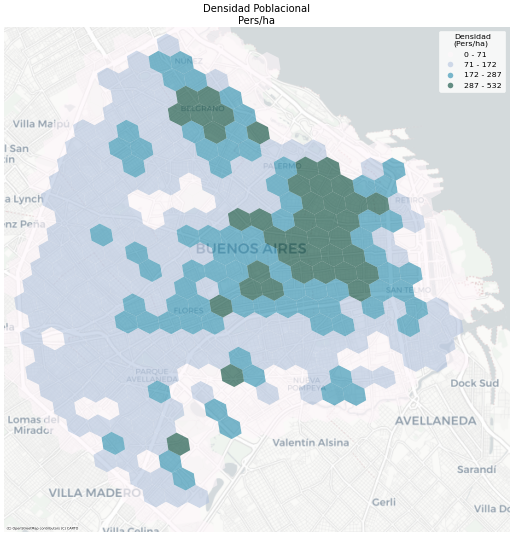

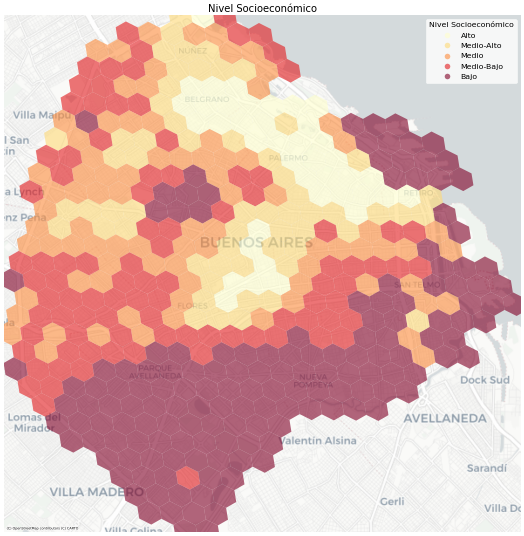

<Figure size 432x288 with 0 Axes>

In [ ]:
pyomu.print_density_nse(hexs, 
                          current_path = current_path, 
                          city=city)

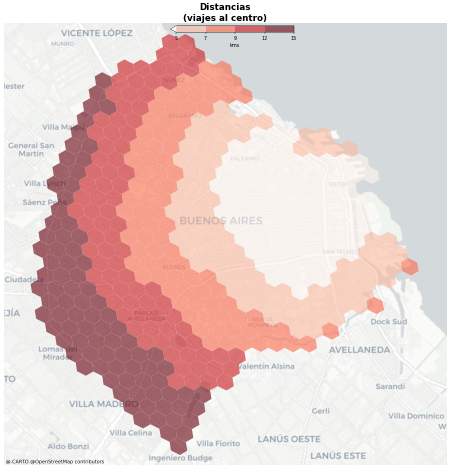

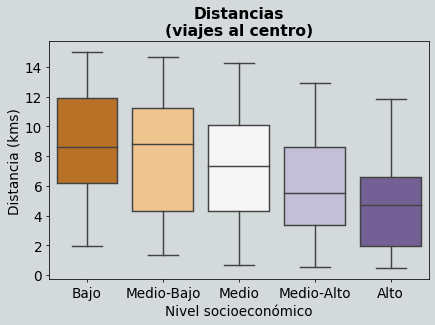

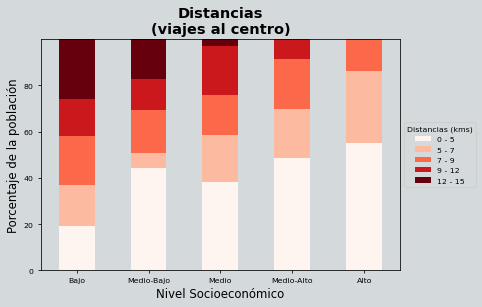

<Figure size 432x288 with 0 Axes>

In [ ]:
od_matrix_avg = pyomu.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population='cant_pers')

pyomu.print_time_distance(hexs, 
                            od_matrix_avg, 
                            indicators_vars=['distance_osm_walk_downtown'],
                            colors_dict={'distance_osm_walk_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

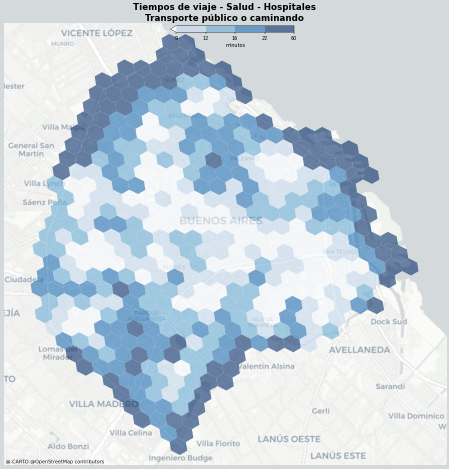

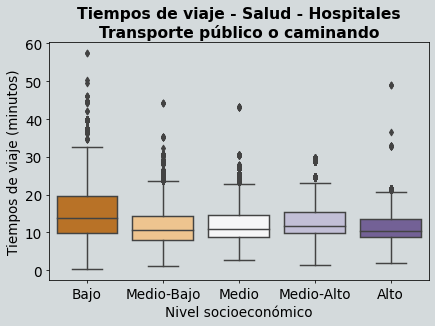

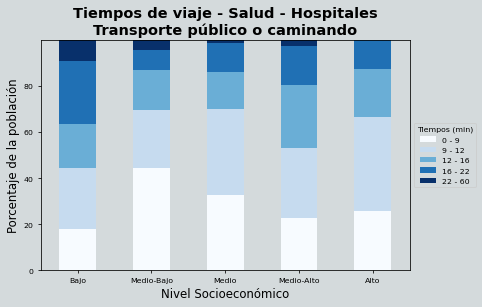

<Figure size 432x288 with 0 Axes>

In [ ]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        indicators_vars=['duration'],
                        colors_dict={'duration':'Blues'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

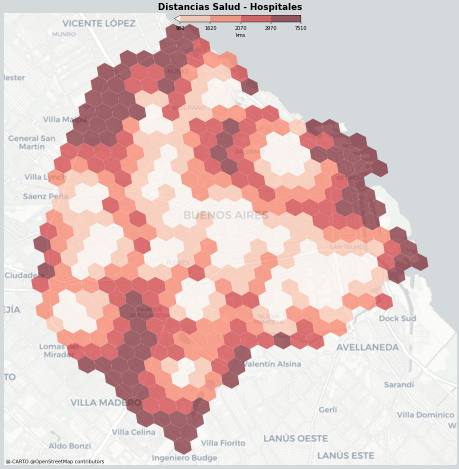

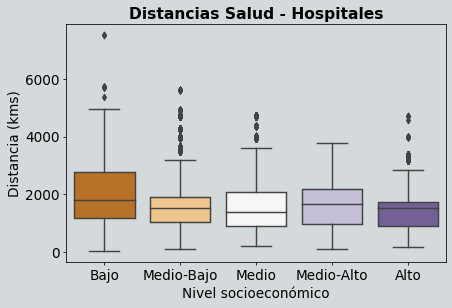

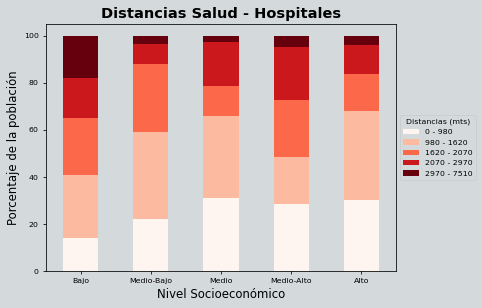

<Figure size 432x288 with 0 Axes>

In [ ]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

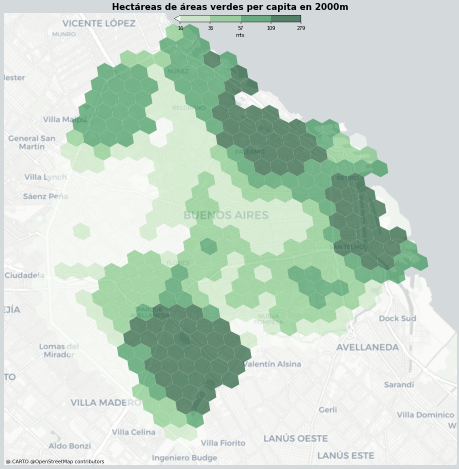

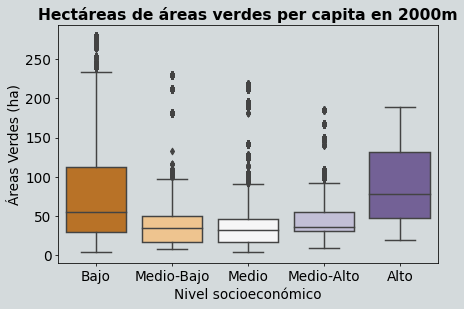

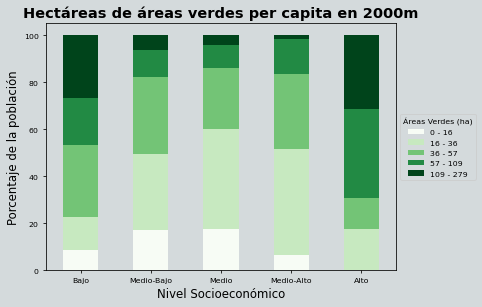

<Figure size 432x288 with 0 Axes>

In [ ]:
pyomu.print_time_distance(hexs, 
                            hexs_green_space, 
                            indicators_vars=['green_area_ha_in2000m'],
                            colors_dict={'green_area_ha_in2000m':'Greens'},                    
                            current_path=current_path)

# Crea powerpoints

In [ ]:
pyomu.create_pptx(hexs, 
                    od_matrix_all_day,
                    od_matrix,
                    od_establecimientos,
                    hexs_green_space,
                    equipment_type=['tipo', 'oferta'],
                    current_path = current_path, 
                    city=city)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias

Resultados_pptx\caba_Accesibilidad.pptx

Establecimientos

Resultados_pptx\caba_Establecimientos.pptx


<Figure size 432x288 with 0 Axes>